# Курсовая работа
## Выполнил студент группы БФИ2201 Балыко Владислав Васильевич

### Цель:

### Написать программу, которая анализирует данные о продажах товаров из CSV-файла.

> Дополнительные модули, использованные при выполнение лабораторной

In [43]:
import csv
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox, ttk
from datetime import datetime
from collections import deque

In [44]:
# Чтение данных из CSV-файла
orders = deque()
with open('sales.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Пропустить заголовок
    for row in reader:
        orders.append(row)

# Переменные для расчетов
total_revenue = 0
product_sales = {}
product_revenue = {}

# Обработка данных
while orders:
    order = orders.popleft()  # Извлекаем заказы из начала дека
    order_id = int(order[0])
    order_date = order[1]
    product_name = order[2]
    product_category = order[3]
    quantity_sold = int(order[4])
    unit_price = float(order[5])
    total_cost = float(order[6])

    # Общая выручка
    total_revenue += total_cost

    # Подсчет количества продаж
    if product_name not in product_sales:
        product_sales[product_name] = 0
    product_sales[product_name] += quantity_sold

    # Подсчет общей стоимости продаж
    if product_name not in product_revenue:
        product_revenue[product_name] = 0
    product_revenue[product_name] += total_cost

print(f'Общая выручка: {total_revenue:.2f}')

# Найти товар, который был продан наибольшее количество раз
most_sold_product = None
max_sales = 0
for product, sales in product_sales.items():
    if sales > max_sales:
        max_sales = sales
        most_sold_product = product

print(f'Товар, который был продан наибольшее количество раз: {most_sold_product} ({max_sales} единиц)')

# Найти товар, который принес наибольшую выручку
highest_revenue_product = None
max_revenue = 0
for product, revenue in product_revenue.items():
    if revenue > max_revenue:
        max_revenue = revenue
        highest_revenue_product = product

print(f'Товар, который принес наибольшую выручку: {highest_revenue_product} ({max_revenue:.2f})')

# Составить отчет
report = []
for product in product_sales:
    total_sales = product_sales[product]
    total_income = product_revenue[product]
    revenue_share = (total_income / total_revenue) * 100
    report.append([product, total_sales, total_income, revenue_share])

# Сортировка отчета по доле выручки (QuickSort)
def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)

def partition(arr, low, high):
    pivot = arr[high][3]  # Доля выручки как опорный элемент
    i = low - 1
    for j in range(low, high):
        if arr[j][3] > pivot:  # Сортировка по убыванию
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

# Применение быстрой сортировки к отчету
quicksort(report, 0, len(report) - 1)

# Печать отчета
print('\nОтчет:')
for item in report:
    print(f'{item[0]}: {item[1]} ед., {item[2]:.2f}, {item[3]:.2f}%')

# Сохранить отчет в новый CSV-файл
with open('sales_report.csv', mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Название товара', 'Количество продаж', 'Общая стоимость', 'Доля выручки'])
    for item in report:
        writer.writerow(item)

print('\nОтчет сохранен в файл sales_report.csv')

Общая выручка: 59700.00
Товар, который был продан наибольшее количество раз: Кроссовки (150 единиц)
Товар, который принес наибольшую выручку: Планшет (20000.00)

Отчет:
Планшет: 100 ед., 20000.00, 33.50%
Ноутбук: 50 ед., 10000.00, 16.75%
Кроссовки: 150 ед., 7500.00, 12.56%
Смартфон: 70 ед., 7000.00, 11.73%
Футболка: 100 ед., 5000.00, 8.38%
Пк: 45 ед., 4500.00, 7.54%
Куртка: 50 ед., 2500.00, 4.19%
Джинсы: 50 ед., 2500.00, 4.19%
Видеокарта: 10 ед., 700.00, 1.17%

Отчет сохранен в файл sales_report.csv


#### Построение графика

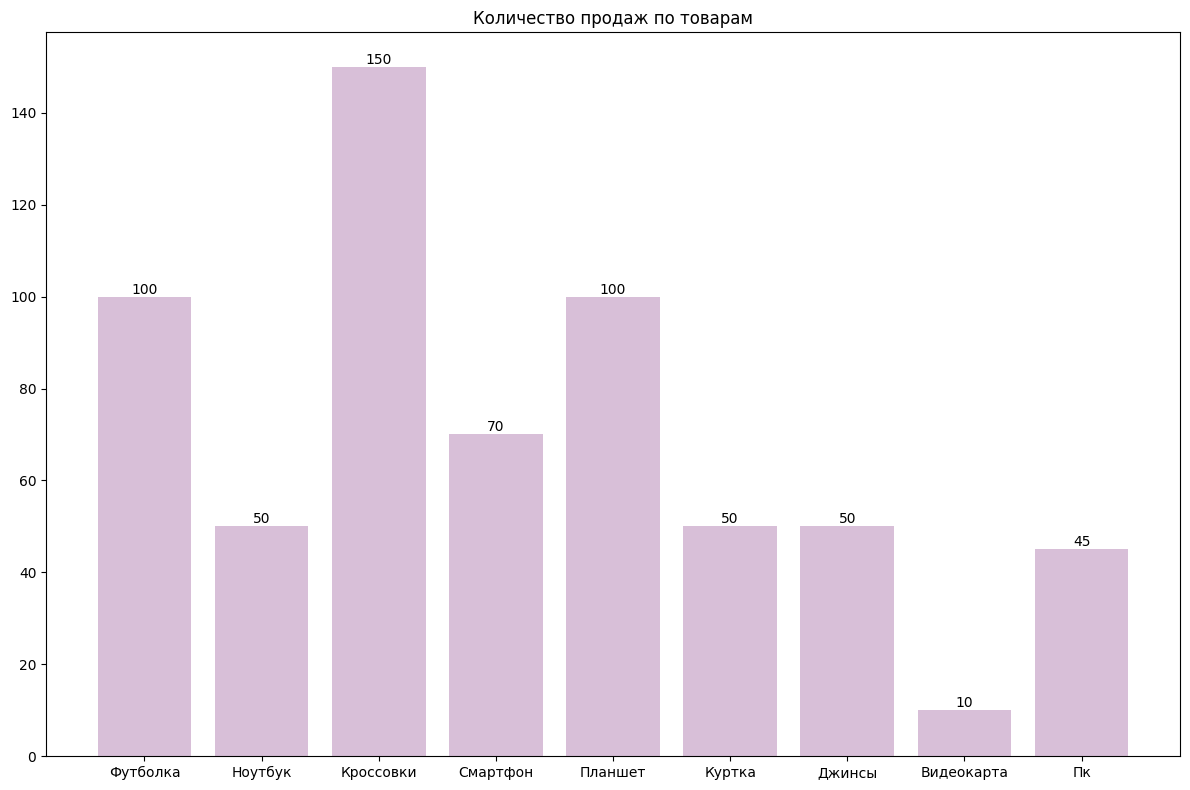

In [45]:
# Построить гистограмму для всех товаров
product_names = list(product_sales.keys())
sales_counts = list(product_sales.values())

plt.figure(figsize=(12, 8))
bars = plt.bar(product_names, sales_counts, color='thistle')
plt.title('Количество продаж по товарам')

# Добавить метки на столбцах
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Добавление данных в sales.csv

In [39]:
# Функция для получения последнего номера заказа
def get_last_order_id():
    try:
        with open('sales.csv', newline='', encoding='utf-8') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)  # Пропустить заголовок
            last_order_id = 0
            for row in reader:
                last_order_id = int(row[0])
            return last_order_id
    except FileNotFoundError:
        return 0

# Функция для проверки, что строка содержит только буквы
def is_alpha(string):
    return string.isalpha()

# Функция для проверки, что строка содержит только числа
def is_numeric(string):
    return string.isdigit()

# Функция для добавления заказа
def add_order():
    try:
        product_name = entry_product_name.get()
        quantity_sold = entry_quantity_sold.get()
        unit_price = entry_unit_price.get()

        if not is_alpha(product_name):
            raise ValueError("Название товара должно содержать только буквы")
        if not is_numeric(quantity_sold):
            raise ValueError("Количество продаж должно содержать только цифры")
        if not is_numeric(unit_price):
            raise ValueError("Цена за единицу должна содержать только цифры")

        quantity_sold = int(quantity_sold)
        unit_price = float(unit_price)
        
        last_order_id = get_last_order_id()
        order_id = last_order_id + 1
        order_date = datetime.now().strftime("%Y-%m-%d")
        product_category = category_var.get()
        total_cost = quantity_sold * unit_price

        with open('sales.csv', 'a', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow([order_id, order_date, product_name, product_category, quantity_sold, unit_price, total_cost])

        messagebox.showinfo("Успех", "Данные успешно добавлены")
        clear_entries()
        update_order_id_and_date()

    except ValueError as e:
        messagebox.showerror("Ошибка", str(e))

# Функция для очистки полей ввода
def clear_entries():
    entry_product_name.delete(0, tk.END)
    entry_quantity_sold.delete(0, tk.END)
    entry_unit_price.delete(0, tk.END)

# Функция для обновления номера заказа и даты
def update_order_id_and_date():
    last_order_id = get_last_order_id()
    order_id_var.set(last_order_id + 1)
    order_date_var.set(datetime.now().strftime("%Y-%m-%d"))

# Создание окна
root = tk.Tk()
root.title("Добавление данных о продажах")

# Переменные для номера заказа и даты
order_id_var = tk.IntVar()
order_date_var = tk.StringVar()

# Метки и поля ввода
tk.Label(root, text="Номер заказа").grid(row=0)
tk.Label(root, text="Дата заказа").grid(row=1)
tk.Label(root, text="Название товара").grid(row=2)
tk.Label(root, text="Категория товара").grid(row=3)
tk.Label(root, text="Количество продаж").grid(row=4)
tk.Label(root, text="Цена за единицу").grid(row=5)

entry_order_id = tk.Entry(root, textvariable=order_id_var, state='readonly')
entry_order_date = tk.Entry(root, textvariable=order_date_var, state='readonly')
entry_product_name = tk.Entry(root)
category_var = tk.StringVar()
entry_product_category = ttk.Combobox(root, textvariable=category_var)
entry_product_category['values'] = ['Одежда', 'Электроника', 'Обувь']
entry_quantity_sold = tk.Entry(root)
entry_unit_price = tk.Entry(root)

entry_order_id.grid(row=0, column=1)
entry_order_date.grid(row=1, column=1)
entry_product_name.grid(row=2, column=1)
entry_product_category.grid(row=3, column=1)
entry_quantity_sold.grid(row=4, column=1)
entry_unit_price.grid(row=5, column=1)

# Кнопка добавления
tk.Button(root, text='Добавить', command=add_order).grid(row=6, column=0, columnspan=2)

# Инициализация полей номера заказа и даты
update_order_id_and_date()

# Запуск окна
root.mainloop()

### Вывод:

### Разработанная программа является эффективным инструментом для анализа данных о продажах. Она позволяет получить информацию об общей выручке, популярных товарах и их вкладе в общий доход.
### Использование хеш-таблиц, массивов, алгоритмов сортировки и дека позволило оптимизировать работу программы, повысить ее производительность.